# Differential Equations - Second Order

(adapted from CHEM 1000 - Spring 2023 Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 11 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand a few basic categories of second-order ordinary differential equations
- Understand solving linear 2nd order ODEs with constant coefficients

## Linear Second-Order Differential Equations with Constant Coefficients

Consider the homogeneous linear second order ODE:

$$
\frac{d^{2}}{d x^{2}} y(x)+b \frac{d}{d x} y(x)+c y(x)=0
$$

Assume $b$ and $c$ are constants. It's not hard to imagine the *ansatz*

$$
y(x)=e^{\alpha x}
$$

where $\alpha$ can be a complex number.

$$
\frac{d^{2}}{d x^{2}} e^{\alpha x}+b \frac{d}{d x} e^{\alpha x}+c e^{\alpha x}
$$

Applying the derivatives:

$$
\alpha^{2} e^{\alpha x}+b \alpha e^{\alpha x}+c e^{\alpha x}=0
$$

There's a *trivial* solution, $e^{\alpha x} = 0$ .. but let's ignore that for now.

Otherwise, we need to solve what's called the *auxiliary* equation:

$$
\alpha^{2}+b \alpha+c=0
$$

Of course, this is just a normal quadratic formula:

$$
\alpha_{\pm}=\frac{-b \pm \sqrt{b^{2}-4 c}}{2}
$$

and then our general solution to the original differential equation is:

$$
y(x)=c_{1} e^{\alpha_{+} x}+c_{2} e^{\alpha_{-} x}
$$

We can categorize the solutions based on the constants $b$ and $c$ from the differential equation:

<img src="./images/second-order-auxiliary.png" width='350' />

In [1]:
# We're going to plot some of our results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


## Simplified Solutions

### Real Roots

Let's try the example:

$$
\frac{d^{2}}{d x^{2}} y(x)+\frac{d}{d x} y(x)-2 y(x)=0
$$

So the auxiliary equation is:

$$
\alpha^{2}+\alpha-2=(\alpha-1)(\alpha+2)=0
$$

The roots are then +1 and -2 and the general solution will be:

$$
y(x)=c_{1} e^{x}+c_{2} e^{-2 x}
$$

We can then use boundary conditions to determine the coefficients:

$$
y(0)=c_{1}+c_{2}=3
$$

and if we know the first derivative too:

$$
\left.\frac{d y}{d x}\right|_{x=0}=\left[c_{1} e^{x}-2 c_{2} e^{-2 x}\right]_{x=0}=c_{1}-2 c_{2}=0
$$

Then we get a final solution:

$$
y(x)=2 e^{x}+e^{-2 x}
$$

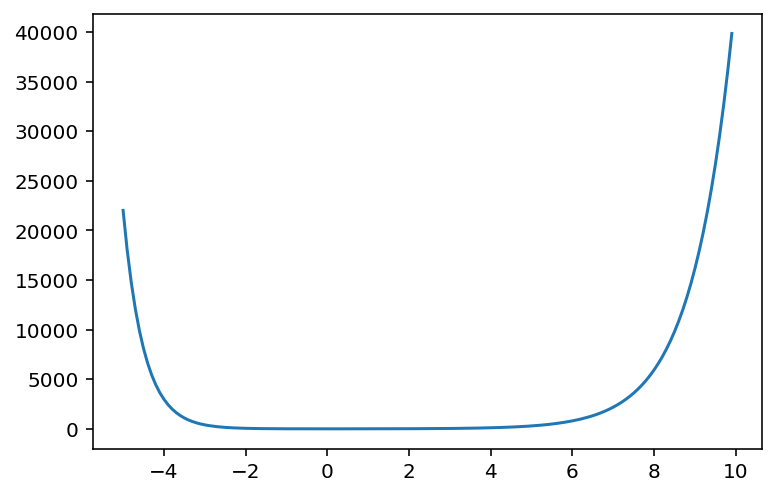

In [2]:
x = np.arange(-5, 10, 0.1)
y = 2*np.exp(x) + np.exp(-2*x)

plt.plot(x, y)
plt.show()

### Imaginary Roots

What if $b$ is zero?

$$
\frac{d^{2}}{d x^{2}} y(x)+c y(x)=0
$$

Then $b^2 < 4c$ so the roots of the auxiliary equation will be imaginary:

$$
\alpha_{\pm}=\pm i \sqrt{c}
$$

So then our solution would look something like this:

$$
y(x)=c_{1} e^{i \sqrt{c} x}+c_{2} e^{-i \sqrt{c} x}
$$

The good news is that we can use the Euler relation to convert from $e^{ix}$ to $\sin$ and $\cos$ instead:

$$
e^{i x}=\cos (x)+i \sin (x)
$$

So our general solution can be written as:

$$
y(x)=c_{1}^{\prime} \cos (\sqrt{c} x)+c_{2}^{\prime} \sin (\sqrt{c} x)
$$

In this case, where the roots of the auxiliary equation are purely imaginary, our solution is a real-valued form in sines and cosines.

$$
\frac{d^{2}}{d x^{2}} y(x)+9 y(x)=0
$$

To solve this, we want a function in which the **second** derivative is equal to some multiple of our original function:

- Sine and Cosine
- Exponential

Our auxiliary equation is:

$$
\alpha^{2}+9=(\alpha-3 i)(\alpha+3 i)=0
$$

so we'd have:

$$
y(x)=c_{1} e^{i 3 x}+c_{2} e^{-i 3 x} = c_{1}^{\prime} \cos (3 x)+c_{2}^{\prime} \sin (3 x)
$$

We just need to solve for the coefficients from the initial conditions, for example:

$$
y(0)=c_{1}^{\prime}=1
$$

Notice that with this form, the initial conditions are fairly easy because $\sin x$ is zero at $x = 0$

$$
\left.\frac{d y}{d x}\right|_{x=0}=\left[-3 c_{1}^{\prime} \sin (3 x)+3 c_{2}^{\prime} \cos (3 x)\right]_{x=0}=3 c_{2}^{\prime}=6
$$

So our final equation is:

$$
y(x)=\cos (3 x)+2 \sin (3 x)
$$

**Let's check our answer by plugging it into the differential equation...**

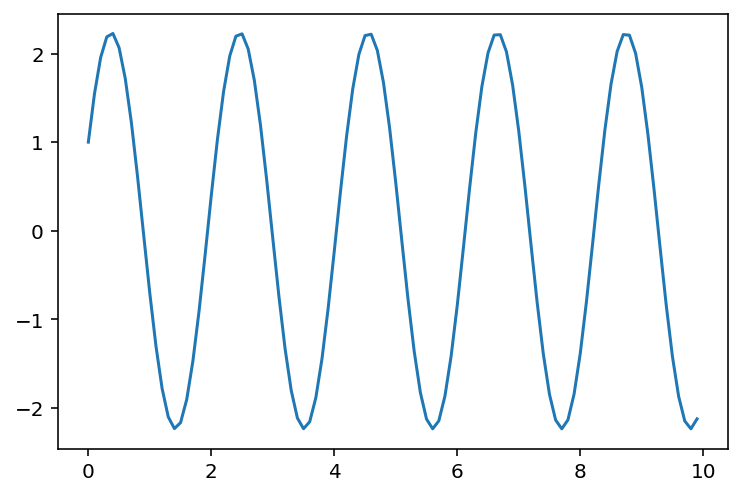

In [3]:
x = np.arange(0, 10, 0.1)
y = np.cos(3*x) + 2*np.sin(3*x)

plt.plot(x, y)
plt.show()

### Complex Roots

Let's take the case where $b ≠ 0$ but $b^2 < 4c$ so we end up with *complex* roots to our auxiliary equation.

$$
\alpha_{\pm}=\frac{-b \pm \sqrt{b^{2}-4 c}}{2}=\frac{-b \pm \sqrt{c^{\prime}}}{2}
$$

Our solutions will have the general form:

$$
y(x)=c_{1} \exp \left[-\frac{1}{2}\left(b-i \sqrt{c^{\prime}}\right) x\right]+c_{2} \exp \left[-\frac{1}{2}\left(b+i \sqrt{c^{\prime}}\right) x\right]
$$

Yuck. Let's try pulling the real value part out...

$$
y(x)=e^{-b x / 2}\left[c_{1} e^{i \sqrt{c^{\prime}} x / 2}+c_{2} e^{-i \sqrt{c^{\prime}} x / 2}\right]
$$

so now, using Euler's relation:

$$
y(x)=e^{-b x / 2}\left[c_{1}^{\prime} \cos \left(\sqrt{c^{\prime}} x / 2\right)+c_{2}^{\prime} \sin \left(\sqrt{c^{\prime}} x / 2\right)\right]
$$

Depending on whether $b<0$ this will either be exponentially increasing (forced) or exponentially decreasing (damped) sinusoidal functions.

For example:

$$
\frac{d^{2}}{d x^{2}} y(x)+2 \frac{d}{d x} y(x)+10 y(x)=0
$$

Our auxiliary equation is:

$$
\alpha^{2}+2 \alpha+10=0
$$

with roots;

$$
\alpha_{\pm}=\left\{\begin{array}{l}
-1+3 i \\
-1-3 i
\end{array}\right.
$$

Applying the Euler form, we get a general solution:

$$
y(x)=e^{-x}\left[c_{1}^{\prime} \cos (3 x)+c_{2}^{\prime} \sin (3 x)\right]
$$

If we apply boundary conditions, we can solve for $c_{1}^{\prime}$ and $c_{2}^{\prime}$

$$
y(x)=e^{-x}\left[\cos (3 x)+\frac{1}{3} \sin (3 x)\right]
$$

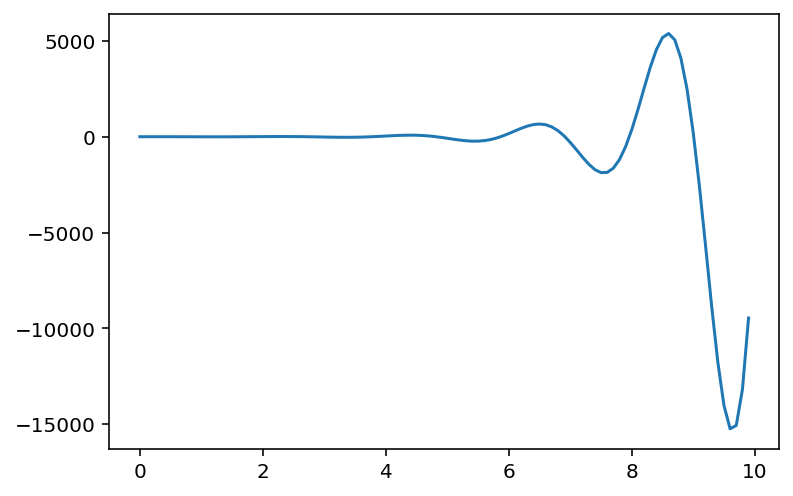

In [4]:
x = np.arange(0, 10, 0.1)
y = np.exp(x)*(np.cos(3*x) + np.sin(3*x)/3)

plt.plot(x, y)
plt.show()

-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>